# TAREA #1: ENTENDER EL ENUNCIADO DEL PROBLEMA Y EL CASO PRÁCTICO


![alt text](https://drive.google.com/uc?id=14M0CRE2eOemPRVPTyifQJvxc-IDmH5ZA)

![alt text](https://drive.google.com/uc?id=1e-TS-JlOplK9HYEoQSYonHlRGWlyMA4O)

![alt text](https://drive.google.com/uc?id=1D61l-Lo_agZBo3lJaOPX-9IxtxUwh6u2)


Fuente: https://www.kaggle.com/c/facial-keypoints-detection/overview

Fuente: https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data


# PARTE 1. DETECCIÓN DE PUNTOS FACIALES CLAVES

![alt text](https://drive.google.com/uc?id=1IMU3Ja8JH1Yb4VtEW3t-h90rqYnVaQQZ)

![alt text](https://drive.google.com/uc?id=1FjsnBgcwYthJAzZ-S70tiDaMSPIrjI3L)

# TAREA #2: IMPORTAR LIBRERÍAS Y DATASETS

In [ ]:
# Necesitaremos montar su disco usando los siguientes comandos:
# Para obtener más información sobre el montaje, puedes consultar: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Importamos los paquetes necesarios

import pandas as pd
import numpy as np
import os
import PIL
import seaborn as sns
import pickle
from PIL import *
# import cv2
import tensorflow as tf
from tensorflow import keras
from keras.applications import DenseNet121
from keras.models import Model, load_model
from keras.initializers import glorot_uniform
from keras.utils import plot_model
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
#from tensorflow.python.keras import *
from keras.preprocessing.image import ImageDataGenerator
from keras import layers, optimizers
#from keras.applications.resnet50 import ResNet50
from keras.layers import *
from keras import backend as K
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from google.colab.patches import cv2_imshow

In [2]:
# Cargamos los puntos faciales clave

keyfacial_df=pd.read_csv('data.csv')

In [3]:
keyfacial_df

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,67.180378,35.816373,33.239956,34.921932,59.347973,37.000904,72.667896,37.097600,39.404349,36.589944,...,60.065396,64.397610,73.248393,35.446431,74.014748,48.708626,76.760852,48.559612,77.335618,191 191 191 190 189 185 184 120 54 34 19 24 31...
2136,65.724490,36.301020,25.377551,37.311224,58.530612,37.739796,74.448980,37.525510,33.551020,38.107143,...,62.472789,66.928121,79.229046,28.015377,81.151722,48.771976,81.816774,49.287271,82.871156,19 19 19 18 13 7 3 4 3 1 3 9 11 12 12 13 10 9 ...
2137,68.430866,38.651975,28.895857,37.617027,61.659350,40.100902,75.586792,40.219182,37.665118,39.087245,...,63.289576,68.864397,77.495823,22.013981,77.368995,49.180628,79.043130,47.176739,89.544522,31 40 47 31 54 58 63 100 86 80 82 75 79 86 90 ...
2138,64.152180,30.691592,27.000898,40.868082,56.505624,34.126963,73.436776,28.556335,34.746122,40.506939,...,59.735799,73.730743,70.273886,38.777143,80.684286,58.042857,79.301429,58.611086,80.355543,7 1 5 1 3 20 12 0 5 8 6 18 13 9 8 12 12 11 4 8...


In [4]:
# Obtenemos información relevante del dataset
keyfacial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [5]:
# Comprobamos si hay valores nulos en el dataset
keyfacial_df.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [6]:
keyfacial_df['Image'].shape

(2140,)

In [7]:
# Dado que los valores para la imagen se dan como cadenas separadas por espacios, separamos los valores usando ' ' como separador.
# Luego convertimos esto en una matriz numérica usando np.fromstring y convierta la matriz 1D obtenida en una matriz 2D de forma (96, 96)
keyfacial_df['Image'] = keyfacial_df['Image'].apply(lambda x: np.fromstring(x, dtype = int, sep = ' ').reshape(96, 96))

In [8]:
# Obtain the Shape of the image
keyfacial_df['Image'][0].shape

(96, 96)

MINI RETO #1:
- Obtenga los valores promedio, mínimo y máximo para `right_eye_center_x`.

In [9]:
keyfacial_df.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,...,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000
mean,66.221549,36.842274,29.640269,37.063815,59.272128,37.856014,73.412473,37.640110,36.603107,37.920852,...,47.952141,57.253926,63.419076,75.887660,32.967365,76.134065,48.081325,72.681125,48.149654,82.630412
std,2.087683,2.294027,2.051575,2.234334,2.005631,2.034500,2.701639,2.684162,1.822784,2.009505,...,3.276053,4.528635,3.650131,4.438565,3.595103,4.259514,2.723274,5.108675,3.032389,4.813557
min,47.835757,23.832996,18.922611,24.773072,41.779381,27.190098,52.947144,26.250023,24.112624,26.250023,...,24.472590,41.558400,43.869480,57.023258,9.778137,56.690208,32.260312,56.719043,33.047605,57.232296
25%,65.046300,35.468842,28.472224,35.818377,58.113054,36.607950,71.741978,36.102409,35.495730,36.766783,...,46.495330,54.466000,61.341291,72.874263,30.879288,73.280038,46.580004,69.271669,46.492000,79.417480
50%,66.129065,36.913319,29.655440,37.048085,59.327154,37.845220,73.240045,37.624207,36.620735,37.920336,...,47.900511,57.638582,63.199057,75.682465,33.034022,75.941985,47.939031,72.395978,47.980854,82.388899
75%,67.332093,38.286438,30.858673,38.333884,60.521492,39.195431,74.978684,39.308331,37.665280,39.143921,...,49.260657,60.303524,65.302398,78.774969,35.063575,78.884031,49.290000,75.840286,49.551936,85.697976
max,78.013082,46.132421,42.495172,45.980981,69.023030,47.190316,87.032252,49.653825,47.293746,44.887301,...,65.279654,75.992731,84.767123,94.673637,50.973348,93.443176,61.804506,93.916338,62.438095,95.808983


# TAREA #3: VISUALIZACIÓN DE IMÁGENES


C:\Users\Adron\AppData\Local\Temp\ipykernel_25604\1696914900.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(keyfacial_df.loc[i][j-1], keyfacial_df.loc[i][j], 'rx')


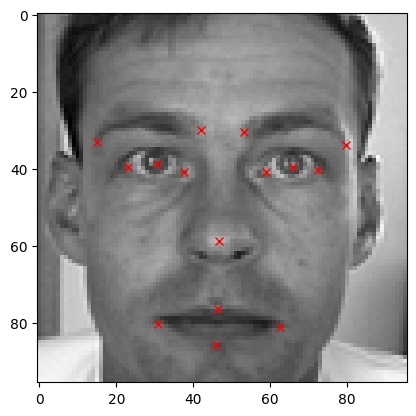

In [10]:
# Representamos una imagen aleatoria del conjunto de datos junto con puntos clave faciales.
# Los datos de la imagen se obtienen de df ['Image'] y se representan usando plt.imshow
# 15 coordenadas x e y para la imagen correspondiente
# Dado que las coordenadas x están en columnas pares como 0,2,4, .. y las coordenadas y están en columnas impares como 1,3,5, ..
# Accedemos a su valor usando el comando .loc, que obtiene los valores de las coordenadas de la imagen en función de la columna a la que se refiere.

i = np.random.randint(1, len(keyfacial_df))
plt.imshow(keyfacial_df['Image'][i], cmap = 'gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df.loc[i][j-1], keyfacial_df.loc[i][j], 'rx')


C:\Users\Adron\AppData\Local\Temp\ipykernel_25604\2156694595.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(keyfacial_df.loc[i][j-1], keyfacial_df.loc[i][j], 'rx')


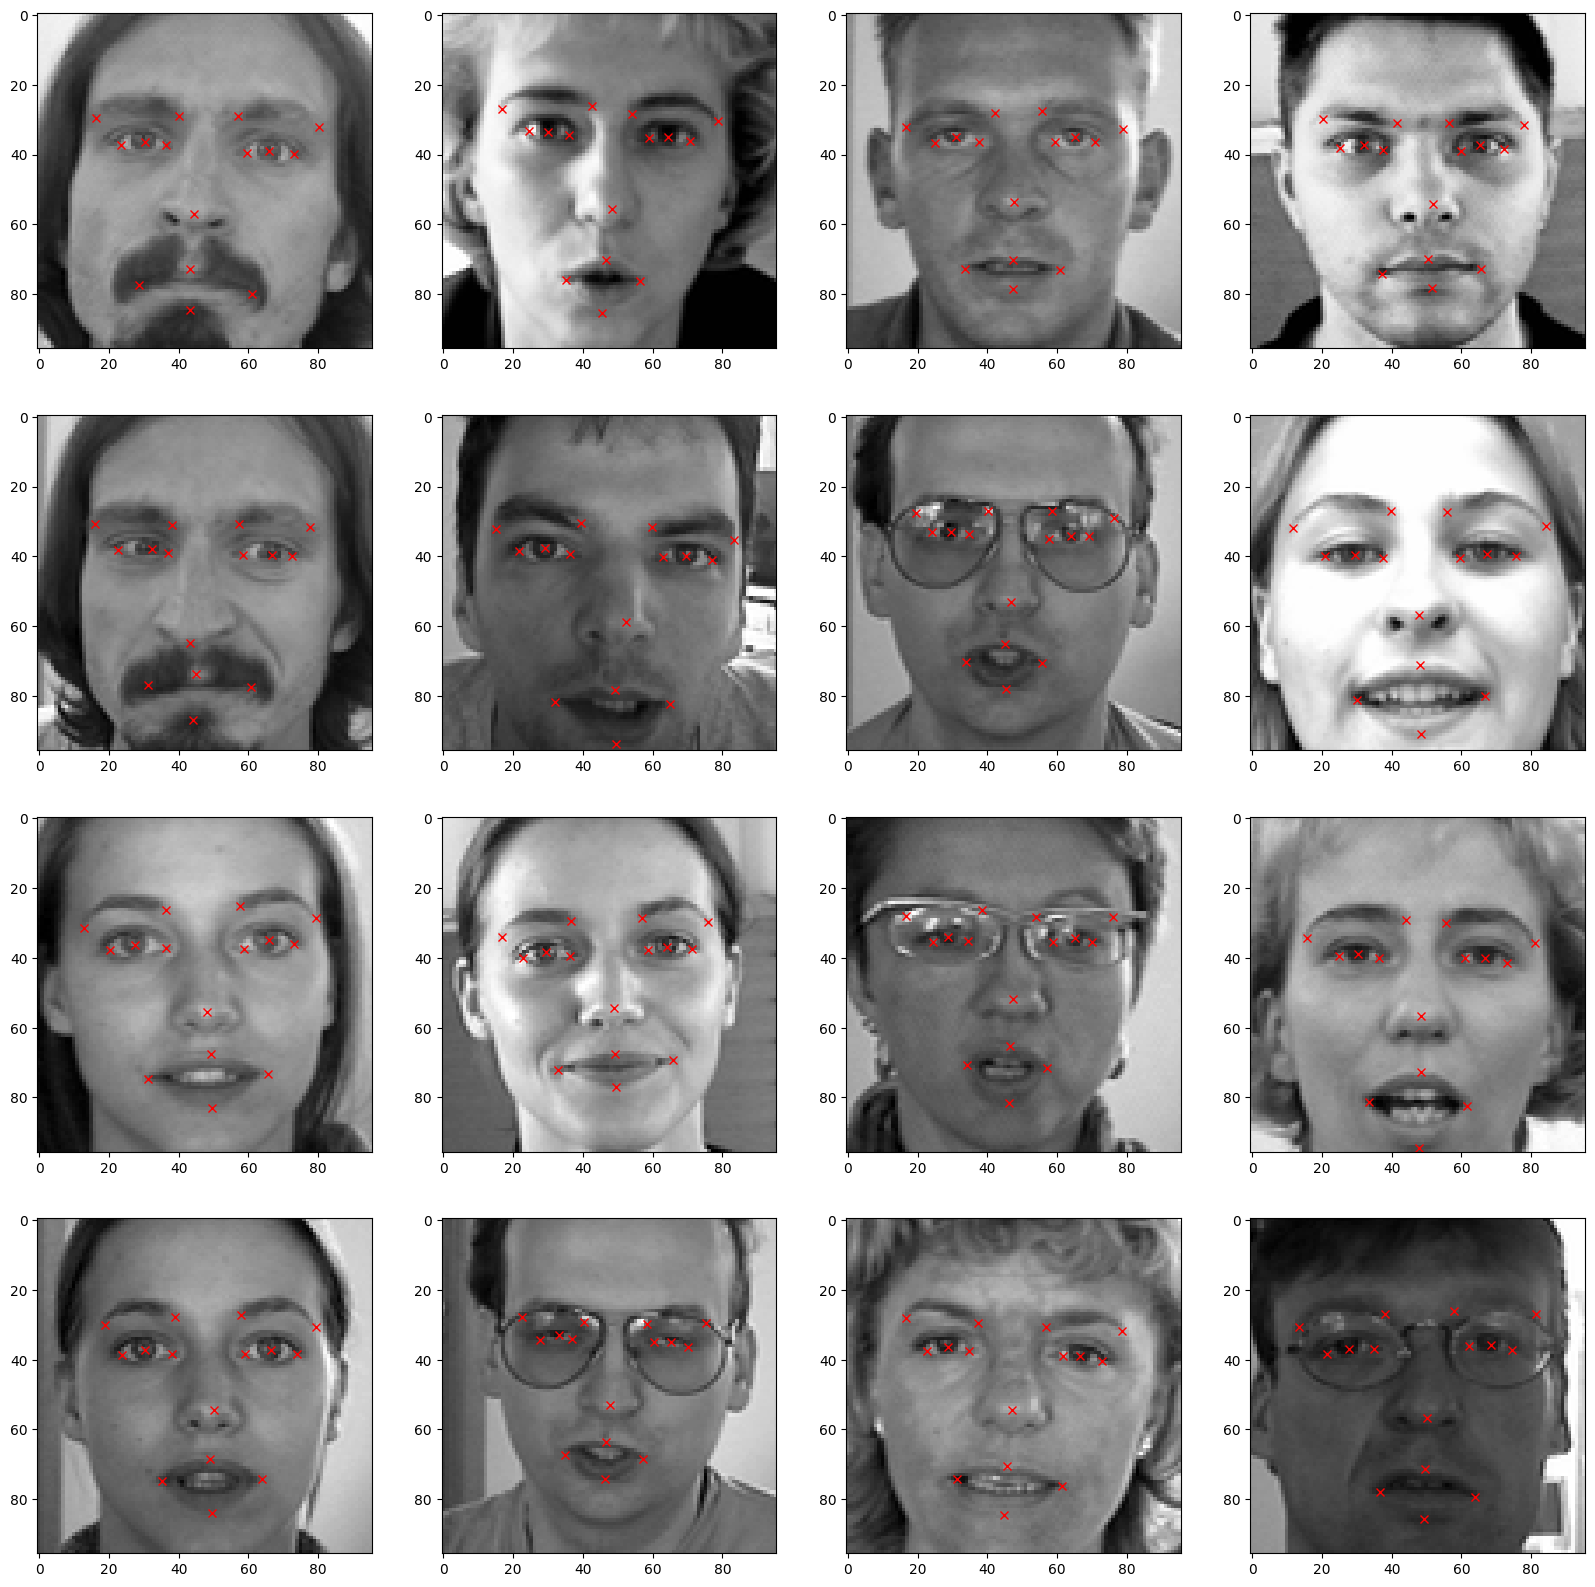

In [11]:
# Veamos más imágenes en formato matricial
fig = plt.figure(figsize=(20, 20))

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1)
    image = plt.imshow(keyfacial_df['Image'][i],cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(keyfacial_df.loc[i][j-1], keyfacial_df.loc[i][j], 'rx')


MINI RETO #2:
- Realiza una verificación adicional en los datos visualizando aleatoriamente 64 nuevas imágenes junto con sus puntos clave correspondientes

C:\Users\Adron\AppData\Local\Temp\ipykernel_25604\3758619733.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(keyfacial_df.loc[k][j-1], keyfacial_df.loc[k][j], 'rx')


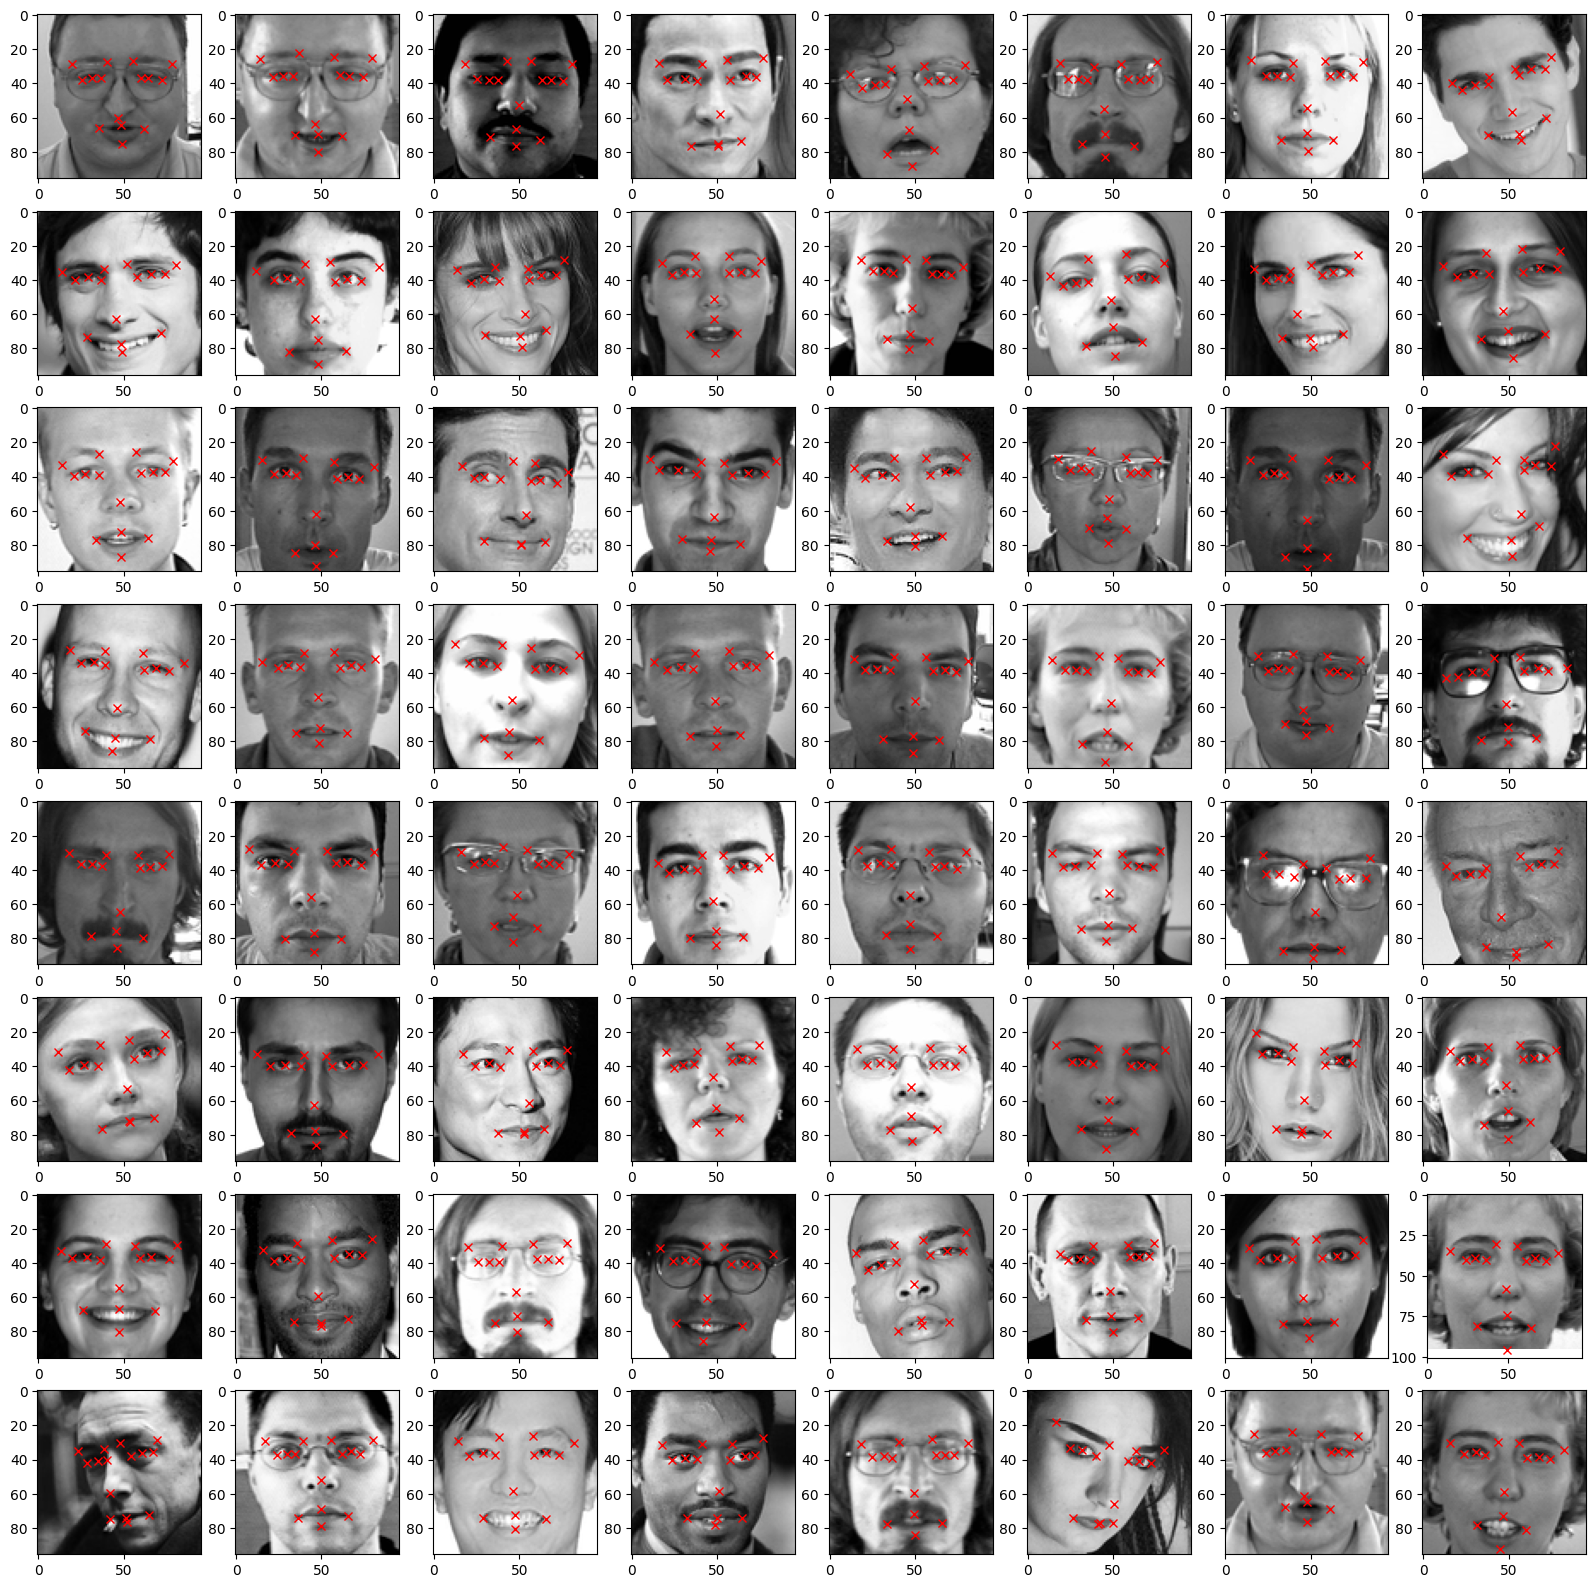

In [12]:
import random

fig = plt.figure(figsize=(20, 20))

for i in range(64):
    k = random.randint(1, len(keyfacial_df))
    ax = fig.add_subplot(8, 8, i + 1)
    image = plt.imshow(keyfacial_df['Image'][k],cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(keyfacial_df.loc[k][j-1], keyfacial_df.loc[k][j], 'rx')


[texto del enlace](https://)# TAREA #4: AUMENTACIÓN DE LAS IMÁGENES

In [13]:
# Creamos una copia del dataframe
import copy
keyfacial_df_copy = copy.copy(keyfacial_df)

In [14]:
# Obtenemos las columnas del dataframe

columns = keyfacial_df_copy.columns[:-1]
columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [15]:
# Horizontal Flip - Damos la vuelta a las imágenes entorno al eje y
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x: np.flip(x, axis = 1))

# dado que estamos volteando horizontalmente, los valores de la coordenada y serían los mismos
# Solo cambiarían los valores de la coordenada x, todo lo que tenemos que hacer es restar nuestros valores iniciales de la coordenada x del ancho de la imagen (96)
for i in range(len(columns)):
  if i%2 == 0:
    keyfacial_df_copy[columns[i]] = keyfacial_df_copy[columns[i]].apply(lambda x: 96. - float(x) )

C:\Users\Adron\AppData\Local\Temp\ipykernel_25604\1349635977.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(keyfacial_df.loc[0][j-1], keyfacial_df.loc[0][j], 'rx')


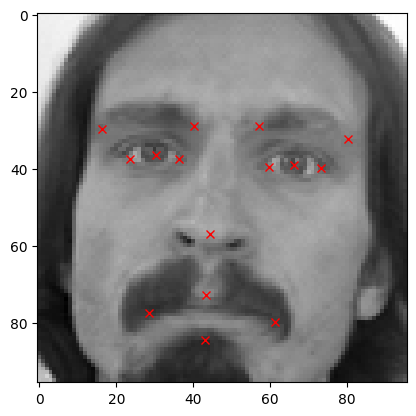

In [16]:
# Mostramos la imagen original
plt.imshow(keyfacial_df['Image'][0], cmap = 'gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df.loc[0][j-1], keyfacial_df.loc[0][j], 'rx')

C:\Users\Adron\AppData\Local\Temp\ipykernel_25604\1699575005.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')


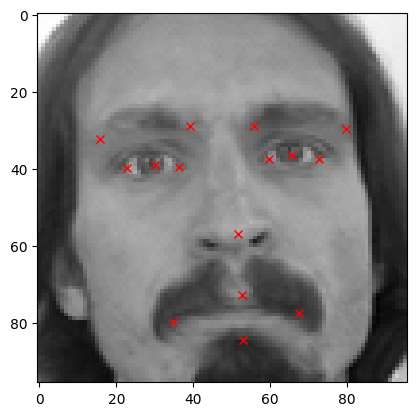

In [17]:
# Mostramos la imagen girada horizontalmente
plt.imshow(keyfacial_df_copy['Image'][0],cmap='gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')

In [18]:
# Concatenamos el dataset original con el dataframe aumentado
augmented_df = np.concatenate((keyfacial_df, keyfacial_df_copy))

In [19]:
augmented_df.shape

(4280, 31)

In [20]:
# Aumentar aleatoriamente el brillo de las imágenes
# Multiplicamos los valores de los píxeles por valores aleatorios entre 1,5 y 2 para aumentar el brillo de la imagen
# Recortamos el valor entre 0 y 255

import random

keyfacial_df_copy = copy.copy(keyfacial_df)
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x:np.clip(random.uniform(1.5, 2)* x, 0.0, 255.0))
augmented_df = np.concatenate((augmented_df, keyfacial_df_copy))
augmented_df.shape

(6420, 31)

C:\Users\Adron\AppData\Local\Temp\ipykernel_25604\4054267404.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')


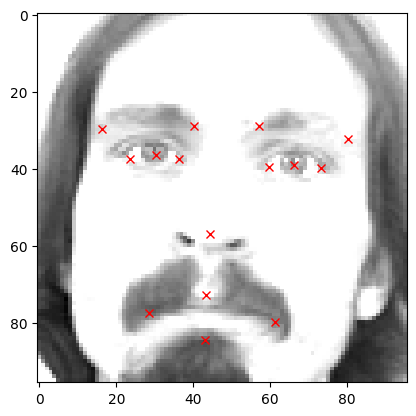

In [21]:
# Mostramos la imagen con el brillo aumentado

plt.imshow(keyfacial_df_copy['Image'][0], cmap='gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')

MINI RETO #3:
- Aumenta las imágenes volteándolas verticalmente (Sugerencia: voltea a lo largo del eje x y ten en cuenta que si lo hacemos a lo largo del eje x, las coordenadas x no cambiarán)

In [22]:
keyfacial_df_copy = copy.copy(keyfacial_df)

In [23]:
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x: np.flip(x, axis = 0))

for i in range(len(columns)):
  if i%2 == 1:
    keyfacial_df_copy[columns[i]] = keyfacial_df_copy[columns[i]].apply(lambda x: 96. - float(x) )

MINI RETO #4:
- Haz una comprobación adicional y visualiza las imágenes.

C:\Users\Adron\AppData\Local\Temp\ipykernel_25604\3595391385.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')


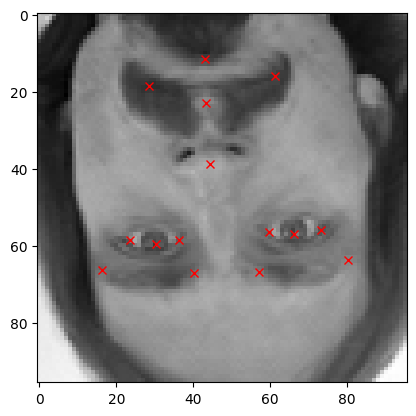

In [24]:
plt.imshow(keyfacial_df_copy['Image'][0], cmap='gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')

# TAREA #5: NORMALIZACIÓN DE LOS DATOS Y PREPARACIÓN PARA EL ENTRENAMIENTO

In [38]:
# Obtenemos el valor de las imágenes que está presente en la columna 31 (dado que el índice comienza desde 0, nos referimos a la columna 31 por 30 en Python)
img = augmented_df[:,30]

# Normalizamos las imágenes
img = img/255.

# Creamos un array vacío de tamaño (x, 96, 96, 1) para subministrar al modelo
X = np.empty((len(img), 96, 96, 1))

# Iteramos sobre la lista de imágenes y añadimos las nusnas ak array vacío tras expandir su dimensión de (96, 96) a (96, 96, 1)
for i in range(len(img)):
  X[i,] = np.expand_dims(img[i], axis = 2)

# Convertimos el tipo array a float32
X = np.asarray(X).astype(np.float32)
X.shape

(6420, 96, 96, 1)

In [26]:
import numpy as np
# Supongamos que X es una matriz 2D
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Acceder a la primera fila de X
fila_0 = X[0,]  # Esto es equivalente a X[0]
print(fila_0)


[1 2 3]


In [27]:
# Obtenemos el valor de las coordenadas x & y que se utilizarán como target.
y = augmented_df[:,:30]
y = np.asarray(y).astype(np.float32)
y.shape

(6420, 30)

In [28]:
# Dividimos los datos en entrenamiento y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

ValueError: Found input variables with inconsistent numbers of samples: [3, 6420]

MINI RETO #5:
- Intenta usar un valor diferente para `test_size` y verifica que la división es correcta.

In [34]:
X_train.shape

NameError: name 'X_train' is not defined

In [ ]:
X_test.shape

[texto del enlace](https://)# TAREA #6: ENTENDER LA TEROÍA E INTUICIÓN DETRÁS DE LAS REDES NEURONALES

![alt text](https://drive.google.com/uc?id=1E-hJFxIjPSgQfZgQvooa1YVmAx-pFhrc)

![alt text](https://drive.google.com/uc?id=1BY96KuWq3ugAaGXGv2iij2kDlK5rveHe)

MINI RETO #6:
- Lista almenos 3 funciones diferentes de activación e indica cuál es el tipo preferido para usar en las capas ocultas.¡

![alt text](https://drive.google.com/uc?id=1IXblu0IO-0_JX9iXeRolxlfV9EgrC2Li)

MINI RETO #7:
- Lista almenos 3 redes neuronales diferentes y sus respectivas aplicaciones.

# TAREA #7: ENTENDER EL ENTRENAMIENDO EN REDES Y LOS ALGORITMOS DE GRADIENTE DESCENDENTE

![alt text](https://drive.google.com/uc?id=1_gqDWFp8yxcMORywHD5BpqJdTqzAyfUr)

![alt text](https://drive.google.com/uc?id=1lKbftYl6MTfyNha0GLFQAF56Mbai2xAh)

![alt text](https://drive.google.com/uc?id=1pMTlXBupNYQVb9PGzU0Y1gNpoX18Zyog)

![alt text](https://drive.google.com/uc?id=1HVHA3DTrCjEa2Z6EL5JAHPgilBTTyxA9)

![alt text](https://drive.google.com/uc?id=1DP05EPIqUmRxaTnx4HoaLZGjPZnoRa0N)

MINI RETO #8:
- ¿Qué ocurre cuando configuramos el ratio de aprendizaje a los valores extremos (i.e: valores muy pequeños y muy grandes)? ¿Cómo se puede conseguir el mejor resultado de ambos escenarios?

# TAREA #8: ENTENDER LA TEORÍA E INTUICIÓN DETRÁS DE LAS REDES NEURONALES CONVOLUCIONALES Y RESNETS

![alt text](https://drive.google.com/uc?id=1MyP2gNs5cGoPpwygKYiQoQoDjRfaNe3L)

![alt text](https://drive.google.com/uc?id=1nVMlRrisFq4_pSxCwm8SVNiANJTmX0-b)

![alt text](https://drive.google.com/uc?id=1we_JB96LvF1r6PC995FNm3M-YzA3fAyI)

![alt text](https://drive.google.com/uc?id=1AkCcwPFXQnpaZKsnePwIIXxCV3Pw6YSw)

MINI RETO #9:
- ¿Cual es la eficacia de las ResNets comparada con AlexNet en datasets de ImageNet?

# TAREA #9: CONSTRUIR UN MODELO DE RED NEURONAL RESIDUAL PROFUNDA PARA CREAR UN MODELO QUE DETECTE PUNTOS FACIALES CLAVE

In [29]:
def res_block(X, filter, stage):

  # Bloque Convolucional
  X_copy = X

  f1 , f2, f3 = filter

  # Camino Principal
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X)

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


  # Camino Corto
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # Añadir
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Bloque de Identidad 1
  X_copy = X


  # Camino Principal
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X)

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # Añadir
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Bloque de Identidad 2
  X_copy = X


  # Camino Principal
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X)

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # Añadir
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [30]:
input_shape = (96, 96, 1)

# Tamaño del tensor de entrada
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3,3))(X_input)

# 1 - Fase
X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2 - Fase
X = res_block(X, filter= [64,64,256], stage= 2)

# 3 - Fase
X = res_block(X, filter= [128,128,512], stage= 3)

# 4 - Fase
#X = res_block(X, filter= [256,256,1024], stage= 4)

# Average Pooling
X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

# Capa Final
X = Flatten()(X)
X = Dense(4096, activation = 'relu')(X)
X = Dropout(0.2)(X)
X = Dense(2048, activation = 'relu')(X)
X = Dropout(0.1)(X)
X = Dense(30, activation = 'relu')(X)


model_1_facialKeyPoints = Model( inputs= X_input, outputs = X)
model_1_facialKeyPoints.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 96, 96, 1)]          0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 102, 102, 1)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1 (Conv2D)              (None, 48, 48, 64)           3200      ['zero_padding2d[0][0]']      
                                                                                                  
 bn_conv1 (BatchNormalizati  (None, 48, 48, 64)           256       ['conv1[0][0]']         

MINI RETO #10:
- Experimenta cambiando la arquitectura de la red eliminando 2 capas MaxPooling del Bloque Res y entrena el modelo de nuevo
- Intenta agregar el bloque `X = res_block (X, filter = [256,256,1024], stage = 4)` después del bloque de la etapa # 3.
- ¿Qué observas? Comenta tu respuesta

# TAREA #10: COMPILAR Y ENTRENAR EL MODELO DE DEEP LEARNING PARA LA DETECCIÓN DE PUNTOS FACIALES CLAVE

In [31]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)
model_1_facialKeyPoints.compile(loss = "mean_squared_error", optimizer = adam , metrics = ['accuracy'])
# Comprueba más sobre el Optimizador Adam en : https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam

In [32]:
# Guardamos el mejor modelo con mejor error de validación
checkpointer = ModelCheckpoint(filepath = "FacialKeyPoints_weights.hdf5", verbose = 1, save_best_only = True)

In [33]:
history = model_1_facialKeyPoints.fit(X_train, y_train, batch_size = 32, epochs = 2, validation_split = 0.05, callbacks=[checkpointer])

NameError: name 'X_train' is not defined

In [ ]:
# Guardamos la arquitectura del modelo en un JSON para luego usarlo

model_json = model_1_facialKeyPoints.to_json()
with open("FacialKeyPoints-model.json","w") as json_file:
  json_file.write(model_json)


MINI RETO #11:
- Experimenta cambiando el tamaño del lote y el valor de   validation split value y vuelve a entrenar el modelo

# TAREA #11: EVALUAR LA EFICACIA DEL MODELO DE DETECCIÓN DE PUNTOS FACIALES CLAVE ENTRENADO

In [ ]:
with open('detection.json', 'r') as json_file:
    json_savedModel= json_file.read()

# Cargar la arquitectura del modelo
model_1_facialKeyPoints = tf.keras.models.model_from_json(json_savedModel)
model_1_facialKeyPoints.load_weights('weights_keypoint.hdf5')
adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_1_facialKeyPoints.compile(loss="mean_squared_error", optimizer= adam , metrics = ['accuracy'])

In [ ]:
# Evaluar el modelo

result = model_1_facialKeyPoints.evaluate(X_test, y_test)
print("Accuracy : {}".format(result[1]))

In [ ]:
# Obtenemos las claves del modelo
history.history.keys()

In [ ]:
# Representamos los scores del entrenamiento

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

# PARTE 2. DETECCIÓN DE LAS EXPRESIONES FACIALES

![alt text](https://drive.google.com/uc?id=1yVo-spGYRjUqKgKohd9WDOs1Ws_TKJId)

![alt text](https://drive.google.com/uc?id=1yv_Nm6elYnuNP-tFr2AuIU_kyENEh-Ek)

# TAREA #12: IMPORTAR & EXPLORAR EL DATASET PARA LA DETECCIÓN DE EXPRESIONES FACIALES

In [ ]:
# Leemos el CSV para los datos de expresiones faciales
facialexpression_df = pd.read_csv('icml_face_data.csv')

In [ ]:
facialexpression_df

In [ ]:
facialexpression_df[' pixels'][0] # Formato String

In [ ]:
# Función para convertir valores de píxel de formato string a formato array

def string2array(x):
  return np.array(x.split(' ')).reshape(48, 48, 1).astype('float32')

In [ ]:
# Redimensionamos la imagen de (48, 48) a (96, 96)

def resize(x):

  img = x.reshape(48, 48)
  return cv2.resize(img, dsize=(96, 96), interpolation = cv2.INTER_CUBIC)

In [ ]:
facialexpression_df[' pixels'] = facialexpression_df[' pixels'].apply(lambda x: string2array(x))

In [ ]:
facialexpression_df[' pixels'] = facialexpression_df[' pixels'].apply(lambda x: resize(x))

In [ ]:
facialexpression_df.head()

In [ ]:
# Comprobamos la estructura del data frame
facialexpression_df.shape

In [ ]:
# Miramos si hay valores nulos en el data frame
facialexpression_df.isnull().sum()

In [ ]:
label_to_text = {0:'Ira', 1:'Odio', 2:'Tristeza', 3:'Felicidad', 4: 'Sorpresa'}

MINI RETO #12:
- Visualizar la primera imagen del data frame y ver que la imagen no se distorsiona al cambiar el tamaño o debido a las operaciones de remodelación

In [ ]:
plt.imshow(facialexpression_df[' pixels'][0], cmap = 'gray')

## TAREA #13: VISUALIZAR LAS IMÁGENES Y MOSTRAR LAS ETIQUETAS

In [ ]:
emotions = [0, 1, 2, 3, 4]

for i in emotions:
  data = facialexpression_df[facialexpression_df['emotion'] == i][:1]
  img = data[' pixels'].item()
  img = img.reshape(96, 96)
  plt.figure()
  plt.title(label_to_text[i])
  plt.imshow(img, cmap = 'gray')

NameError: name 'facialexpression_df' is not defined

MINI RETO #13:
- Representar un gráfico de barras para averiguar cuántas muestras (imágenes) están presentes por cada emoción

In [ ]:
facialexpression_df.emotion.value_counts().index

In [ ]:
facialexpression_df.emotion.value_counts()

In [ ]:
plt.figure(figsize = (10,10))
sns.barplot(x = facialexpression_df.emotion.value_counts().index, y = facialexpression_df.emotion.value_counts())

# TAREA #14: PREPARACIÓN DE LOS DATOS Y AUMENTACIÓN DE LAS IMÁGENES





In [ ]:
# Dividir el dataframe en características y etiquetas para la clasificación
from tensorflow.keras.utils import to_categorical

X = facialexpression_df[' pixels']
y = to_categorical(facialexpression_df['emotion'])


In [ ]:
X[0]

In [ ]:
y

In [ ]:
X.shape

In [ ]:

X = np.stack(X, axis = 0)
X = X.reshape(24568, 96, 96, 1)

print(X.shape, y.shape)

In [ ]:
# Dividir el dataframe en conjunto de entrenamiento, test y validación

from sklearn.model_selection import train_test_split

X_train, X_Test, y_train, y_Test = train_test_split(X, y, test_size = 0.1, shuffle = True)
X_val, X_Test, y_val, y_Test = train_test_split(X_Test, y_Test, test_size = 0.5, shuffle = True)


In [ ]:
print(X_val.shape, y_val.shape)

In [ ]:
print(X_Test.shape, y_Test.shape)

In [ ]:
print(X_train.shape, y_train.shape)

In [ ]:
# Pre Procesado de Imágenes

X_train = X_train/255
X_val   = X_val /255
X_Test  = X_Test/255

NameError: name 'X_train' is not defined

In [ ]:
X_train

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    vertical_flip = True,
    brightness_range = [1.1, 1.5],
    fill_mode = "nearest")


MINI RETO #14:
- Intenta almenos dos técnicas de aumentación de datos adicionales

# TAREA #15: CONSTRUYE Y ENTRENA UN MODELO DE DEEP LEARNING PARA LA CLASIFICACIÓN DE EXPRESIONES FACIALES

In [ ]:
input_shape = (96, 96, 1)

# Tamaño del tensor de entrada
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3, 3))(X_input)

# 1 - Fase
X = Conv2D(64, (7, 7), strides= (2, 2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3, 3), strides= (2, 2))(X)

# 2 - Fase
X = res_block(X, filter= [64, 64, 256], stage= 2)

# 3 - Fase
X = res_block(X, filter= [128, 128, 512], stage= 3)

# 4 - Fase
# X = res_block(X, filter= [256, 256, 1024], stage= 4)

# Average Pooling
X = AveragePooling2D((4, 4), name = 'Averagea_Pooling')(X)

# Capa Final
X = Flatten()(X)
X = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)

model_2_emotion = Model( inputs= X_input, outputs = X, name = 'Resnet18')

model_2_emotion.summary()

In [ ]:
# Entrenar la red
model_2_emotion.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
# Recordemos que el primer modelo de puntos faciales clave se guardó con: FacialKeyPoints_weights.hdf5 and FacialKeyPoints-model.json

# Usamos la parada temprana para salir del entenamiento si el error de validación
# no decrece después de cierto número de epochs (paciencia)
earlystopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)

# Guardamos el mejor modelo con menor error de validación
checkpointer = ModelCheckpoint(filepath = "FacialExpression_weights.hdf5", verbose = 1, save_best_only=True)

In [ ]:
history = model_2_emotion.fit(train_datagen.flow(X_train, y_train, batch_size=64),
	validation_data=(X_val, y_val), steps_per_epoch=len(X_train) // 64,
	epochs= 2, callbacks=[checkpointer, earlystopping])

In [ ]:
# Guardar la arquitectura del modelo en un JSON para su futuro uso

model_json = model_2_emotion.to_json()
with open("FacialExpression-model.json","w") as json_file:
  json_file.write(model_json)

NameError: name 'model_2_emotion' is not defined

MINI RETO #15:
- Experimentar con varios tamaños de lote, paciencia, optimizadores y arquitectura de red para mejorar el rendimiento de la red

# TAREA #16: ENTENDER CÓMO EVALUAR LOS MODELOS DE CLASIFICACIÓN (MATRIZ DE CONFUSIÓN, ACIERTO, PRECISIÓN Y RECUPERACIÓN)

![alt text](https://drive.google.com/uc?id=1PLEhcqt2wDz3kb7J8Wu04PjCr46RzzFf)

![alt text](https://drive.google.com/uc?id=1OHdC1j_9pvDxjbIpe74f7uWqyeXx0jBf)

![alt text](https://drive.google.com/uc?id=1GKH-OB9z60Lf_LzTa9xo0MeavZhH3yEV)

# TAREA #17: EVALUAR LA EFICACIA DEL MODELO CLASIFICADOR DE EXPRESIONES FACIALES ENTRENADO

In [ ]:
with open('emotion.json', 'r') as json_file:
    json_savedModel= json_file.read()

# Cargamos la arquitectura del modelo
model_2_emotion = tf.keras.models.model_from_json(json_savedModel)
model_2_emotion.load_weights('weights_emotions.hdf5')
model_2_emotion.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
score = model_2_emotion.evaluate(X_Test, y_Test)
print('Accuracy en la fase de Test: {}'.format(score[1]))

NameError: name 'model_2_emotion' is not defined

In [ ]:
history.history.keys()

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Accuracy en el Entrenamiento')
plt.plot(epochs, val_accuracy, 'b', label='Accuracy en la Validación')
plt.title('ACCURACY')
plt.legend()

In [ ]:
plt.plot(epochs, loss, 'ro', label='Pérdida en el entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Pérdida en la validación')
plt.title('LOSS')
plt.legend()

In [ ]:
# predicted_classes = model.predict_classes(X_test)
predicted_classes = np.argmax(model_2_emotion.predict(X_Test), axis=-1)
y_true = np.argmax(y_Test, axis=-1)

In [ ]:
y_true.shape

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True, cbar = False)

NameError: name 'y_true' is not defined

MINI RETO #16:
- Mostrar una matriz de 25 imágenes junto con su etiqueta predicha / verdadera
- Mostrar el informe de clasificación y analizar la precisión y la recuperación

In [ ]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (24, 24))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_Test[i].reshape(96,96), cmap = 'gray')
    axes[i].set_title('Predicción = {}\n Verdadera = {}'.format(label_to_text[predicted_classes[i]], label_to_text[y_true[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

NameError: name 'plt' is not defined

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, predicted_classes))

NameError: name 'y_true' is not defined

# PARTE 3. COMBINAR LOS MODELOS DE DETECCIÓN DE PUNTOS CLAVE FACIALES Y DE CLASIFICACIÓN DE EXPRESIONES

# TAREA #18: COMBINAR AMBOS MODELOS (1) DETECCIÓN DE PUNTOS CLAVE FACIALES Y (2) DE EXPRESIONES FACIALES

In [ ]:
def predict(X_test):

  # Hacemos la predicción con el modelo de puntos clave
  df_predict = model_1_facialKeyPoints.predict(X_test)

  # Hacemos la predicción con el modelo de emociones
  df_emotion = np.argmax(model_2_emotion.predict(X_test), axis=-1)

  # Redimensionamos el array de (856,) a (856,1)
  df_emotion = np.expand_dims(df_emotion, axis = 1)

  # Convertimos las predicciones en un dataframe
  df_predict = pd.DataFrame(df_predict, columns= columns)

  # Añadimos la emoción al dataframe de predicciones
  df_predict['emotion'] = df_emotion

  return df_predict

In [ ]:
df_predict = predict(X_test)

In [ ]:
df_predict.head()

MINI RETO #17:
- Representamos una matriz de  16 imágenes junto con su emoción predicha y sus puntos faciales.

In [ ]:
# Representamos las imágenes de test junto con los puntos clave y emociones

fig, axes = plt.subplots(4, 4, figsize = (24, 24))
axes = axes.ravel()

for i in range(16):

    axes[i].imshow(X_test[i].squeeze(),cmap='gray')
    axes[i].set_title('Prediccion = {}'.format(label_to_text[df_predict['emotion'][i]]))
    axes[i].axis('off')
    for j in range(1,31,2):
            axes[i].plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx')


# PARTE 4. DESPLEGAR LOS DOS MODELOS ENTRENADOS

# TAREA #19. GUARDAR EL MODELO ENTRENADO PARA PUBLICAR

![alt text](https://drive.google.com/uc?id=1DBquDj0ce4Vq9KFX7wS-ldT7enXgVGzS)

![alt text](https://drive.google.com/uc?id=1x14nNobS6eeqAjJVZGLZ8MOcgc-WhSBI)

![alt text](https://drive.google.com/uc?id=1zFJZTRkXHWlYQXPQk90IOZnzMTKVKPt5)

- Ahora necesitamos guardar nuestro modelo entrenado y debe guardarse en un formato `SaveModel`.
- El modelo tendrá un número de versión y se guardará en un directorio estructurado
- `tf.saved_model.save` es una función que se usa para crear un modelo guardado que es adecuado para publicar con Tensorflow Serving.
- Una vez guardado el modelo, ahora podemos usar TensorFlow Serving para comenzar a realizar solicitudes de inferencia utilizando una versión específica de nuestro modelo entrenado "servible".
- Utilizaremos `SavedModel` para guardar y cargar nuestro modelo: variables, el gráfico y los metadatos del gráfico.
          
- Consulte esto para obtener más información:
https://www.tensorflow.org/guide/saved_model

In [ ]:
import json
import tensorflow.keras.backend as K

def deploy(directory, model):
  MODEL_DIR = directory
  version = 1

  # Juntamos el directorio del temp model con la versión elegida
  # El resultado será = '\tmp\version number'
  export_path = os.path.join(MODEL_DIR, str(version))
  print('export_path = {}\n'.format(export_path))

  # Guardemos el modelo con saved_model.save
  # Si el directorio existe, debemos borrarlo con '!rm'
  # rm elimina cada fichero especificado usando la consola de comandos.

  if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

  tf.saved_model.save(model, export_path)

  os.environ["MODEL_DIR"] = MODEL_DIR

# TAREA #20. PUBLICAR EL MODELO CON TENSORFLOW SERVING

In [ ]:
# Agreguemos el paquete tensorflow-model-server a nuestra lista de paquetes
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

In [ ]:
# Instalemos tensorflow model server
!apt-get install tensorflow-model-server

In [ ]:
# Vamos a arrancar TensorFlow serving

- Cargaremos nuestro modelo y comenzaremos a hacer inferencias (predicciones) basadas en él.
- Hay algunos parámetros importantes:

   - `rest_api_port`: el puerto que se usará para las solicitudes REST.
   - `model_name`: lo usaremos en la URL de las solicitudes REST. Puedes elegir cualquier nombre
   - `model_base_path`: esta es la ruta al directorio donde ha guardado el modelo.
  
- Para obtener más información sobre REST, consulta en:
https://www.codecademy.com/articles/what-is-rest
- REST es una variante de las llamadas HTTP en el que los comandos http tienen un significado semántico.

In [ ]:
deploy('/model', model_1_facialKeyPoints)

In [ ]:
%%bash --bg
nohup tensorflow_model_server \
  --rest_api_port=4500 \
  --model_name=keypoint_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

In [ ]:
!tail server.log

In [ ]:
deploy('/model1', model_2_emotion)

In [ ]:
%%bash --bg
nohup tensorflow_model_server \
  --rest_api_port=4000 \
  --model_name=emotion_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

In [ ]:
!tail server.log

- **¡Felicidades! Ahora hemos cargado con éxito una versión servible de nuestro modelo `{name: keypoint_model version: 1}`**
- **¡Felicidades! Ahora hemos cargado con éxito una versión servible de nuestro modelo `{name: emotion_model version: 1}`**

# TAREA #21: HACER PETICIONES AL MODELO CON TENSORFLOW SERVING

In [ ]:
import json

# Vamos a crear un objeto JSON y hacer 3 predicciones
data = json.dumps({"signature_name": "serving_default", "instances": X_Test[0:3].tolist()})
print('Data: {} ... {}'.format(data[:50], data[len(data)-52:]))

In [ ]:
!pip install -q requests

In [ ]:
import requests

# Función para hacer predicciones con el modelo publicado
def response(data):
  headers = {"content-type": "application/json"}
  json_response = requests.post('http://localhost:4500/v1/models/keypoint_model/versions/1:predict', data=data, headers=headers, verify = False)
  df_predict = json.loads(json_response.text)['predictions']
  json_response = requests.post('http://localhost:4000/v1/models/emotion_model/versions/1:predict', data=data, headers=headers, verify = False)
  df_emotion = np.argmax(json.loads(json_response.text)['predictions'], axis = 1)

  # Redimensión de (856,) a (856,1)
  df_emotion = np.expand_dims(df_emotion, axis = 1)

  # Convertir las predicciones en un dataframe
  df_predict= pd.DataFrame(df_predict, columns = columns)

  # Añadimos la emoción al dataframe de predicciones
  df_predict['emotion'] = df_emotion

  return df_predict

In [ ]:
# Hacer una predicción
df_predict = response(data)

In [ ]:
df_predict

In [ ]:
# Representar las imágenes de test y sus predicciones de puntos clave y emociones

fig, axes = plt.subplots(3, 1, figsize = (24, 24))
axes = axes.ravel()

for i in range(3):

    axes[i].imshow(X_Test[i].squeeze(),cmap='gray')
    axes[i].set_title('Prediction = {}'.format(label_to_text[df_predict['emotion'][i]]))
    axes[i].axis('off')
    for j in range(1,31,2):
            axes[i].plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx')


# SOLUCIONES A LOS MINI RETOS

MINI RETO #1:
- Obtener los valores promedio, el mínimo y el máximo para `right_eye_center_x`.

In [ ]:
keyfacial_df.describe()

MINI RETO #2:
- Realiza una verificación adicional en los datos visualizando aleatoriamente 64 nuevas imágenes junto con sus puntos clave correspondientes

In [ ]:
import random
# Veamos más imágenes en formato matricial
fig = plt.figure(figsize=(20, 20))

for i in range(64):
    k = random.randint(1, len(keyfacial_df))
    ax = fig.add_subplot(8, 8, i + 1)
    image = plt.imshow(keyfacial_df['Image'][k],cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(keyfacial_df.loc[k][j-1], keyfacial_df.loc[k][j], 'rx')


MINI RETO #3:
- Aumenta las imágenes volteándolas verticalmente (Sugerencia: voltea a lo largo del eje x y ten en cuenta que si lo hacemos a lo largo del eje x, las coordenadas x no cambiarán)

In [ ]:
keyfacial_df_copy = copy.copy(keyfacial_df)

# Voltear las imágenes alrededor del eje x
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x: np.flip(x, axis = 0))

# Como volteamos verticalmente las coordenadas, los valores de x se quedan igual
for i in range(len(columns)):
  if i%2 == 1:
    keyfacial_df_copy[columns[i]] = keyfacial_df_copy[columns[i]].apply(lambda x: 96. - float(x) )

MINI RETO #4:
- Haz una comprobación adicional y visualiza las imágenes.

In [ ]:
# Mostrar la imágen volteada verticalmente
plt.imshow(keyfacial_df_copy['Image'][0],cmap='gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')

MINI RETO #5:
- Intenta usar un valor diferente para `test_size` y verifica que la división es correcta.

In [ ]:
print('Tamaño de entrenamiento =', X_train.shape)
print('Tamaño de test =', X_test.shape)

MINI RETO #6:
- Lista almenos 3 funciones diferentes de activación e indica cuál es el tipo preferido para usar en las capas ocultas.¡

![alt text](https://drive.google.com/uc?id=1G8aJvO6IFxxd7dAdVB1tylWGNcSUM3R4)

![alt text](https://drive.google.com/uc?id=1d4HfwWTawWwpiXYfrADRUGLc0yfJNzoz)

![alt text](https://drive.google.com/uc?id=142wHzaUyjv8185BZS-BisyjQALDOZhSX)

MINI RETO #7:
- Lista almenos 3 redes neuronales diferentes y sus respectivas aplicaciones.

Un buen recurso de by Aravind Pai: https://www.analyticsvidhya.com/blog/2020/02/cnn-vs-rnn-vs-mlp-analyzing-3-types-of-neural-networks-in-deep-learning/

MINI RETO #8:
- ¿Qué ocurre cuando configuramos el ratio de aprendizaje a los valores extremos (i.e: valores muy pequeños y muy grandes)? ¿Cómo se puede conseguir el mejor resultado de ambos escenarios?

Un buen recurso de Jason Brownlee: https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/

MINI RETO #9:
- ¿Cual es la eficacia de las ResNets comparada con AlexNet en datasets de ImageNet?

https://towardsdatascience.com/understanding-and-coding-a-resnet-in-keras-446d7ff84d33

MINI RETO #10:
- Experimenta cambiando la arquitectura de la red eliminando 2 capas MaxPooling del Bloque Res y entrena el modelo de nuevo
- Intenta agregar el bloque `X = res_block (X, filter = [256,256,1024], stage = 4)` después del bloque de la etapa # 3.
- ¿Qué observa? Comenta tu respuesta

El número de parámetros entrenables crece significativamente

MINI RETO #11:
- Experimenta cambiando el tamaño del lote y el valor de   validation split value y vuelve a entrenar el modelo

¡Experimenta! Cambia los valores y observa como mejora. Pon una captura de tus resultados obtenidos

MINI RETO #12:
- Visualizar la primera imagen del data frame y ver que la imagen no se distorsiona al cambiar el tamaño o debido a las operaciones de remodelación

In [ ]:
plt.imshow(facialexpression_df[' pixels'][0], cmap = 'gray')

MINI RETO #13:
- Representar un gráfico de barras para averiguar cuántas muestras (imágenes) están presentes por cada emoción

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x = facialexpression_df.emotion.value_counts().index, y = facialexpression_df.emotion.value_counts() )
plt.title('Número de imágenes por emoción')

MINI RETO #14:
- Intenta almenos dos técnicas de aumentación de datos adicionales

Comprueba aquí la documentación de Keras: https://keras.io/api/preprocessing/image/

In [ ]:
train_datagen = ImageDataGenerator(
rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    vertical_flip = True,
    brightness_range = [1.1, 1.5],
    fill_mode = "nearest")

# Fíjate que "Brightness_range"
# 1.0 no afecta al brillo de la imagen
# números más pequeños que 1.0 oscurecen la imagen [0.5, 1.0]
# números más grandes que 1.0 iluminan la imagen [1.0, 1.5]


MINI RETO #15:
- Experimentar con varios tamaños de lote, paciencia, optimizadores y arquitectura de red para mejorar el rendimiento de la red

Experimenta y cuéntamos cómo mejora la eficacia del modelo.

MINI RETO #16:
- Mostrar una matriz de 25 imágenes junto con su etiqueta predicha / verdadera
- Mostrar el informe de clasificación y analizar la precisión y la recuperación

In [ ]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (24, 24))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshape(96,96), cmap = 'gray')
    axes[i].set_title('Predicción = {}\n Verdadera = {}'.format(label_to_text[predicted_classes[i]], label_to_text[y_true[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, predicted_classes))